### Objective: is to fit a time series model for the meantemp variable in the given data. 
3 things to do:
change the path

change the code for the outofsample and check it


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('D:/Acer/drive e/Imarticus/python/project/Time series/archive/DailyDelhiClimateTrain.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


We can see that there are 5 variables. There is no missing data 

In [4]:
df.drop(['humidity','wind_speed','meanpressure'],1,inplace=True) 
# i have dropped these variables as we will just be working on the meantemp variable that is a univariate time series

In [5]:
df.describe()

,meantemp
count,1462.000000
mean,25.495521
std,7.348103
min,6.000000
25%,18.857143
50%,27.714286
75%,31.305804
max,38.714286


In [6]:
df.head()

,date,meantemp
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000


In [7]:
df.tail()

,date,meantemp
1457,2016-12-28,17.217391
1458,2016-12-29,15.238095
1459,2016-12-30,14.095238
1460,2016-12-31,15.052632
1461,2017-01-01,10.000000


We can see that we have mean temperature starting from 01-01-2013 to 01-01-2017.

In [8]:
type(df.date[0]) 

str

In [9]:
#Convert String format into Datetime
df['date']=pd.to_datetime(df['date'])

In [11]:
type(df.date[0]) # Format changed `

pandas._libs.tslibs.timestamps.Timestamp

In [12]:
df.set_index('date',inplace=True)

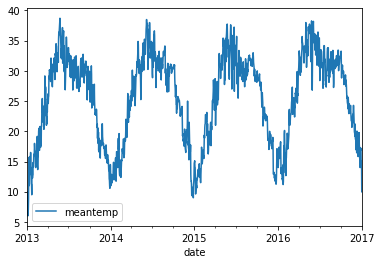

In [13]:
df.plot()

In [14]:
df2 = df.copy()

In [15]:
df2.head()

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000


In [16]:
df2 = df2.resample('1M').mean() # We changed the data from daily to monthly by taking its average


In [17]:
df2.head()

,meantemp
date,
2013-01-31,12.074770
2013-02-28,16.867560
2013-03-31,22.814209
2013-04-30,28.895119
2013-05-31,33.776767


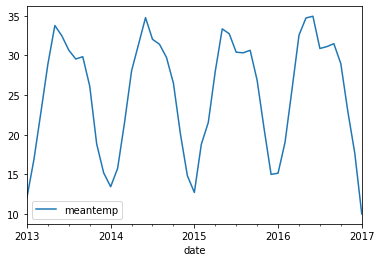

In [18]:
df2.plot()

We see that our data is seasonal. And it makes sense since we have taken monthly meantemp.

In [19]:
### Testing For Stationarity - We need the data to be stationary before fitting a time series model.
## We use dickey fuller test for the same. 
# H0: The series has unit root which implies non-stationarity
# H1: The series is stationary

from statsmodels.tsa.stattools import adfuller

In [20]:
Test_stationarity = adfuller(df2['meantemp'])

In [21]:
print(f'ADF Statistic: {Test_stationarity[0]}',f'p-value: {Test_stationarity[1]}',f'lags: {Test_stationarity[2]}',f'Observations used: {Test_stationarity[3]}')
if (Test_stationarity[1] < .05) :
     print("We have sufficient evidence to reject the test. Hence the series is stationary")
else:
     print("We have insufficient to reject the test. Hence the series is non-stationary")
    

ADF Statistic: -1.0462204206798957 p-value: 0.7360356050589142 lags: 10 Observations used: 38
We have insufficient to reject the test. Hence the series is non-stationary


Since we saw that the series is not stationary. We need to make it stationary. So we go for differencing.

### Differencing 

We are seasonal differencing it. Since we have temperature data.

In [22]:
df2['meantemp'].shift(12).head(20) # It simply shifts first 12 values down

date
2013-01-31          NaN
2013-02-28          NaN
2013-03-31          NaN
2013-04-30          NaN
2013-05-31          NaN
2013-06-30          NaN
2013-07-31          NaN
2013-08-31          NaN
2013-09-30          NaN
2013-10-31          NaN
2013-11-30          NaN
2013-12-31          NaN
2014-01-31    12.074770
2014-02-28    16.867560
2014-03-31    22.814209
2014-04-30    28.895119
2014-05-31    33.776767
2014-06-30    32.480873
2014-07-31    30.663594
2014-08-31    29.547773
Freq: M, Name: meantemp, dtype: float64

In [23]:
df2['meantemp_diffone'] = df2['meantemp'] - df2['meantemp'].shift(12)

In [24]:
df2.head(20)

,meantemp,meantemp_diffone
date,,
2013-01-31,12.074770,NaN
2013-02-28,16.867560,NaN
2013-03-31,22.814209,NaN
2013-04-30,28.895119,NaN
2013-05-31,33.776767,NaN
2013-06-30,32.480873,NaN
2013-07-31,30.663594,NaN
2013-08-31,29.547773,NaN
2013-09-30,29.840595,NaN


In [25]:
df2 = df2.iloc[12:]

In [26]:
df2

,meantemp,meantemp_diffone
date,,
2014-01-31,13.431836,1.357066
2014-02-28,15.746811,-1.120748
2014-03-31,21.593318,-1.220891
2014-04-30,28.058333,-0.836786
2014-05-31,31.405530,-2.371237
2014-06-30,34.770833,2.289960
2014-07-31,32.034163,1.370569
2014-08-31,31.411968,1.864195
2014-09-30,29.762500,-0.078095


In [27]:
Test_stationarity_2 = adfuller(df2['meantemp_diffone'])

In [28]:
Test_stationarity_2

(-4.214425127250887,
 0.0006228172601323936,
 0,
 36,
 {'1%': -3.626651907578875,
  '5%': -2.9459512825788754,
  '10%': -2.6116707716049383},
 113.21800643086704)

In [29]:
Test_stationarity_2
print(f'ADF Statistic: {Test_stationarity_2[0]}',f'p-value: {Test_stationarity_2[1]}',f'lags: {Test_stationarity_2[2]}',f'Observations used: {Test_stationarity_2[3]}')
if (Test_stationarity_2[1] < .05) :
     print("We have sufficient evidence to reject the test. Hence the series is stationary")
else:
     print("We have insufficient to reject the test. Hence the series is non-stationary")


ADF Statistic: -4.214425127250887 p-value: 0.0006228172601323936 lags: 0 Observations used: 36
We have sufficient evidence to reject the test. Hence the series is stationary


One observation here is that I see a lag of zero. Need to clarify this one.

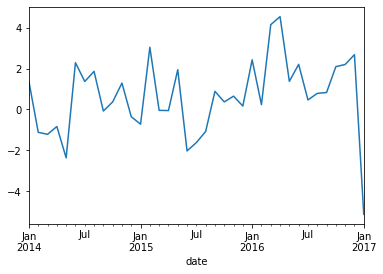

In [30]:
df2['meantemp_diffone'].plot() 

## AR model

In [31]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


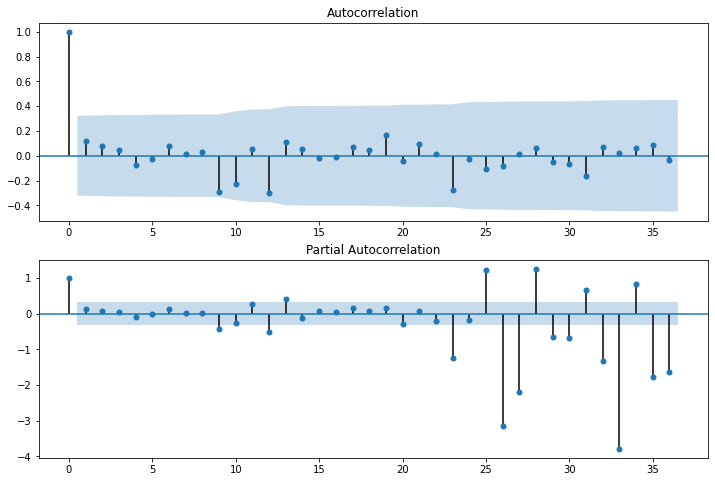

In [32]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df2['meantemp_diffone'],lags=36,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df2['meantemp_diffone'],lags=36,ax=ax2)

Looking at the above plot it seems like a pure MA series since PACF is almost zero at lag 1.

In [38]:
import statsmodels.api as stm

In [51]:
sarima_m_s1=stm.tsa.statespace.SARIMAX(df2['meantemp'],order=(0,0,0),seasonal_order=(0,1,1,12))
sarima_results_s1=sarima_m_s1.fit()

In [52]:
sarima_results_s1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                   meantemp   No. Observations:                   37
Model:             SARIMAX(0, 1, [1], 12)   Log Likelihood                 -54.539
Date:                    Tue, 16 Feb 2021   AIC                            113.079
Time:                            02:48:55   BIC                            115.517
Sample:                        01-31-2014   HQIC                           113.755
                             - 01-31-2017                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.2326      0.503     -0.462      0.644      -1.218       0.753
sigma2         4.4756      1.689      2.649      0.008       1.164       7.787
===================================================================================
Ljung-Box (Q):                       34.08   Jarque-Bera (JB):                 1.97
Prob(Q):                              0.08   Prob(JB):                         0.37
Heteroskedasticity (H):               2.12   Skew:                            -0.55
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
sarima_m_s2=stm.tsa.statespace.SARIMAX(df2['meantemp'],order=(0,0,0),seasonal_order=(0,1,2,12))
sarima_results_s2=sarima_m_s2.fit()

In [54]:
sarima_results_s2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:                      meantemp   No. Observations:                   37
Model:             SARIMAX(0, 1, [1, 2], 12)   Log Likelihood                 -54.519
Date:                       Tue, 16 Feb 2021   AIC                            115.039
Time:                               02:51:04   BIC                            118.696
Sample:                           01-31-2014   HQIC                           116.053
                                - 01-31-2017                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.2049    410.701     -0.000      1.000    -805.163     804.753
ma.S.L24       0.1041   2609.612   3.99e-05      1.000   -5114.641    5114.849
sigma2         4.4678   1591.488      0.003      0.998   -3114.791    3123.727
===================================================================================
Ljung-Box (Q):                       34.12   Jarque-Bera (JB):                 1.95
Prob(Q):                              0.08   Prob(JB):                         0.38
Heteroskedasticity (H):               2.11   Skew:                            -0.54
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
sarima_m=stm.tsa.statespace.SARIMAX(df2['meantemp'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
sarima_results=sarima_m.fit()

In [40]:
sarima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           meantemp   No. Observations:                   37
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -50.788
Date:                            Mon, 15 Feb 2021   AIC                            111.575
Time:                                    21:00:31   BIC                            117.466
Sample:                                01-31-2014   HQIC                           113.138
                                     - 01-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3377      0.562      0.601      0.548      -0.763       1.438
ma.L1         -0.9986     49.252     -0.020      0.984     -97.531      95.534
ar.S.L12      -0.7504     24.106     -0.031      0.975     -47.998      46.497
ma.S.L12       0.3218     36.366      0.009      0.993     -70.954      71.598
sigma2         2.9507    148.774      0.020      0.984    -288.640     294.541
===================================================================================
Ljung-Box (Q):                       49.69   Jarque-Bera (JB):                13.15
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                            -1.24
Prob(H) (two-sided):                  0.34   Kurtosis:                         5.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
sarima_m2=stm.tsa.statespace.SARIMAX(df2['meantemp'],order=(0, 1, 1),seasonal_order=(0,1,1,12))
sarima_results2=sarima_m2.fit()

In [69]:
sarima_results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           meantemp   No. Observations:                   37
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 -52.023
Date:                            Tue, 16 Feb 2021   AIC                            110.047
Time:                                    03:25:45   BIC                            113.581
Sample:                                01-31-2014   HQIC                           110.984
                                     - 01-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7908      0.314     -2.518      0.012      -1.406      -0.175
ma.S.L12      -0.3674      1.264     -0.291      0.771      -2.844       2.109
sigma2         3.9906      2.908      1.372      0.170      -1.709       9.690
===================================================================================
Ljung-Box (Q):                       42.13   Jarque-Bera (JB):                 9.18
Prob(Q):                              0.01   Prob(JB):                         0.01
Heteroskedasticity (H):               2.12   Skew:                            -1.06
Prob(H) (two-sided):                  0.31   Kurtosis:                         5.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
sarima_m3=stm.tsa.statespace.SARIMAX(df2['meantemp'],order=(0, 1, 2),seasonal_order=(0,1,2,12))
sarima_results3=sarima_m3.fit()

In [40]:
sarima_results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           meantemp   No. Observations:                   37
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 12)   Log Likelihood                 -50.905
Date:                            Mon, 15 Feb 2021   AIC                            111.809
Time:                                    06:30:28   BIC                            117.699
Sample:                                01-31-2014   HQIC                           113.372
                                     - 01-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6893     22.739     -0.030      0.976     -45.257      43.879
ma.L2         -0.3072      7.423     -0.041      0.967     -14.856      14.242
ma.S.L12      -0.6597    366.143     -0.002      0.999    -718.287     716.967
ma.S.L24       0.9895   1118.666      0.001      0.999   -2191.556    2193.535
sigma2         1.7627   1975.050      0.001      0.999   -3869.264    3872.789
===================================================================================
Ljung-Box (Q):                       46.12   Jarque-Bera (JB):                11.50
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.11   Skew:                            -1.17
Prob(H) (two-sided):                  0.31   Kurtosis:                         5.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
sarima_m4=stm.tsa.statespace.SARIMAX(df2['meantemp'],order=(0, 1, 1),seasonal_order=(0,1,2,12))
sarima_results4=sarima_m4.fit()

In [42]:
sarima_results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                meantemp   No. Observations:                   37
Model:             SARIMAX(0, 1, 1)x(0, 1, [1, 2], 12)   Log Likelihood                 -51.384
Date:                                 Mon, 15 Feb 2021   AIC                            110.769
Time:                                         06:31:44   BIC                            115.481
Sample:                                     01-31-2014   HQIC                           112.019
                                          - 01-31-2017                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6607      0.315     -2.096      0.036      -1.278      -0.043
ma.S.L12      -0.4765    287.045     -0.002      0.999    -563.073     562.120
ma.S.L24       0.9916   1211.229      0.001      0.999   -2372.973    2374.956
sigma2         2.0762   2514.293      0.001      0.999   -4925.848    4930.001
===================================================================================
Ljung-Box (Q):                       46.48   Jarque-Bera (JB):                 7.16
Prob(Q):                              0.00   Prob(JB):                         0.03
Heteroskedasticity (H):               2.10   Skew:                            -1.04
Prob(H) (two-sided):                  0.31   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Looking at the above model summaries. The SARIMAX model with order (0,1,1) and seasonal order (0,1,1,12) has the lowest AIC, so is the best fit in this scenario. Here order means order that stands for ARIMA and seosonal order is for seasonal ARIMA where differencing is done by shifting to 12 points down.

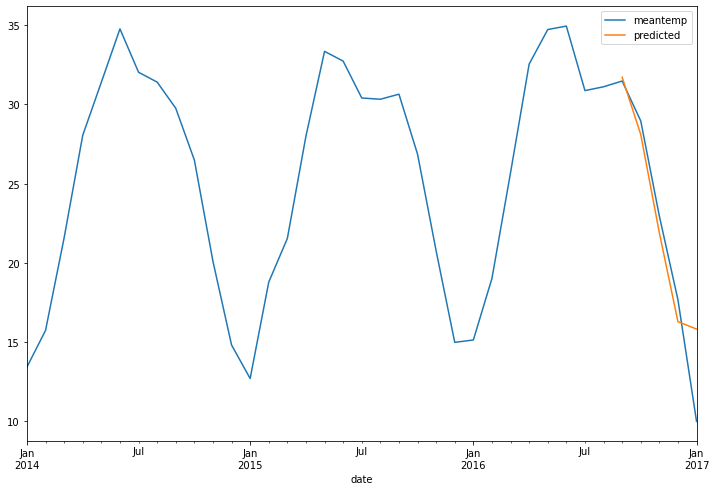

In [70]:
df2['predicted']=sarima_results2.predict(start=32,end=36,dynamic=True)
df2[['meantemp','predicted']].plot(figsize=(12,8))

In [71]:
df2.index[-1]

Timestamp('2017-01-31 00:00:00', freq='M')

In [72]:
df2.tail()

,meantemp,meantemp_diffone,predicted
date,,,
2016-09-30,31.479768,0.829768,31.720546
2016-10-31,28.961680,2.096473,28.103689
2016-11-30,22.957378,2.203212,21.901588
2016-12-31,17.672565,2.682933,16.293741
2017-01-31,10.000000,-5.139363,15.828264


In [73]:
from pandas.tseries.offsets import DateOffset
dates_outofsample = []
for i in range(0,24):
    x = DateOffset(months=i)
    dates_outofsample.append(df2.index[-1] + x)

In [74]:
dates_outofsample

[Timestamp('2017-01-31 00:00:00'),
 Timestamp('2017-02-28 00:00:00'),
 Timestamp('2017-03-31 00:00:00'),
 Timestamp('2017-04-30 00:00:00'),
 Timestamp('2017-05-31 00:00:00'),
 Timestamp('2017-06-30 00:00:00'),
 Timestamp('2017-07-31 00:00:00'),
 Timestamp('2017-08-31 00:00:00'),
 Timestamp('2017-09-30 00:00:00'),
 Timestamp('2017-10-31 00:00:00'),
 Timestamp('2017-11-30 00:00:00'),
 Timestamp('2017-12-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-02-28 00:00:00'),
 Timestamp('2018-03-31 00:00:00'),
 Timestamp('2018-04-30 00:00:00'),
 Timestamp('2018-05-31 00:00:00'),
 Timestamp('2018-06-30 00:00:00'),
 Timestamp('2018-07-31 00:00:00'),
 Timestamp('2018-08-31 00:00:00'),
 Timestamp('2018-09-30 00:00:00'),
 Timestamp('2018-10-31 00:00:00'),
 Timestamp('2018-11-30 00:00:00'),
 Timestamp('2018-12-31 00:00:00')]

In [75]:
new_df=pd.DataFrame(index=dates_outofsample[1:],columns=df2.columns)

In [76]:
new_df

,meantemp,meantemp_diffone,predicted
2017-02-28,NaN,NaN,NaN
2017-03-31,NaN,NaN,NaN
2017-04-30,NaN,NaN,NaN
2017-05-31,NaN,NaN,NaN
2017-06-30,NaN,NaN,NaN
2017-07-31,NaN,NaN,NaN
2017-08-31,NaN,NaN,NaN
2017-09-30,NaN,NaN,NaN
2017-10-31,NaN,NaN,NaN
2017-11-30,NaN,NaN,NaN


In [77]:
new_df=pd.concat([df2,new_df])

In [78]:
new_df

,meantemp,meantemp_diffone,predicted
2014-01-31,13.431836,1.357066,NaN
2014-02-28,15.746811,-1.120748,NaN
2014-03-31,21.593318,-1.220891,NaN
2014-04-30,28.058333,-0.836786,NaN
2014-05-31,31.405530,-2.371237,NaN
2014-06-30,34.770833,2.289960,NaN
2014-07-31,32.034163,1.370569,NaN
2014-08-31,31.411968,1.864195,NaN
2014-09-30,29.762500,-0.078095,NaN
2014-10-31,26.496544,0.367358,NaN


In [79]:
new_df.index[36]

Timestamp('2017-01-31 00:00:00')

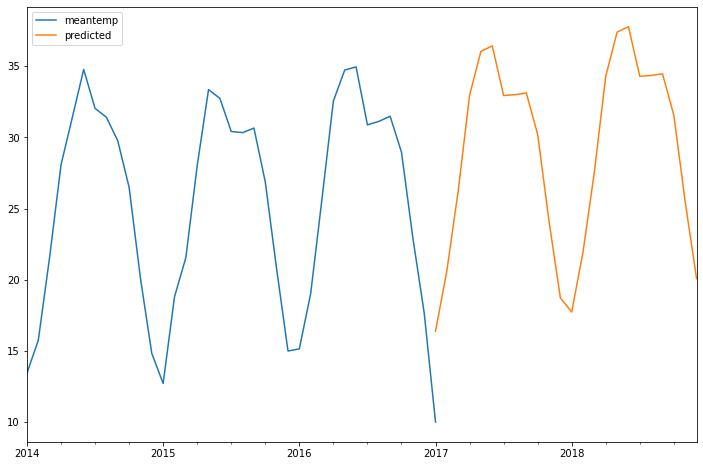

In [80]:
new_df['predicted'] = sarima_results2.predict(start = 36 , end = 70, dynamic= True)  
new_df[['meantemp', 'predicted']].plot(figsize=(12, 8)) 

MAPE on the test data and decomposition. Remove log transformation
https://medium.com/towards-artificial-intelligence/stock-price-change-forecasting-with-time-series-sarimax-4f5ca053d464
    https://towardsdatascience.com/time-series-forecasting-with-a-sarima-model-db051b7ae459